In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Импортируем нужные библиотеки

Считываем данные, делаем их более удобными для работы

In [175]:
df = pd.read_excel("C:\Users\iRU\Analytics\200_выпусков_'О_мой_питч!'_OutOfScope_update.xlsx", sheet_name='Лист2')
df = df.rename(columns={'Инвестиции' : 'Инвестиции(руб)', 'Без' : 'Воздержалось'})
df['За'] = pd.to_numeric(df['За'], errors='coerce')
df['Против'] = pd.to_numeric(df['Против'], errors='coerce')
df['Воздержалось'] = pd.to_numeric(df['Воздержалось'], errors='coerce')
df = df.drop(columns='№')
df = df.drop(index=82) #Дропаем строку в бизнесом, о котором нет данных
df = df.drop_duplicates(subset='Название')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3433442575.py, line 1)

Информация о типах данных в нашем датафрейме

In [123]:
df.dtypes

Название                   object
Описание                   object
Сайт                       object
Инвестиции(руб)             int64
За                          int64
Против                      int64
Воздержалось              float64
Всего                       int64
Дата               datetime64[ns]
dtype: object

In [124]:
df.loc[123]

Название                                                        Pick
Описание           Сервис бесконтактного заказа еды навынос из ре...
Сайт                                            https://thepick.app/
Инвестиции(руб)                                              6750000
За                                                               196
Против                                                           140
Воздержалось                                                   100.0
Всего                                                            436
Дата                                             2021-03-11 00:00:00
Name: 123, dtype: object

Общие метрики

In [125]:
SUM_invest = int(df['Инвестиции(руб)'].sum())
SUM_pros = int(df['За'].sum())
SUM_cons = int(df['Против'].sum())
SUM_abstained = int(df['Воздержалось'].sum())
SUM_voice = int(df['Всего'].sum())

MEAN_invest = int(df['Инвестиции(руб)'].mean())
MEAN_pros = int(df['За'].mean())
MEAN_cons = int(df['Против'].mean())
MEAN_abstained = int(df['Воздержалось'].mean())
MEAN_voice = int(df['Всего'].mean())

MIN_invest = int(df['Инвестиции(руб)'].min())
MIN_pros = int(df['За'].min())
MIN_cons = int(df['Против'].min())
MIN_abstained = int(df['Воздержалось'].min())
MIN_voice = int(df['Всего'].min())

MAX_invest = int(df['Инвестиции(руб)'].max())
MAX_pros = int(df['За'].max())
MAX_cons = int(df['Против'].max())
MAX_abstained = int(df['Воздержалось'].max())
MAX_voice = int(df['Всего'].max())

График, показывающий зависимость голосов от года за все время

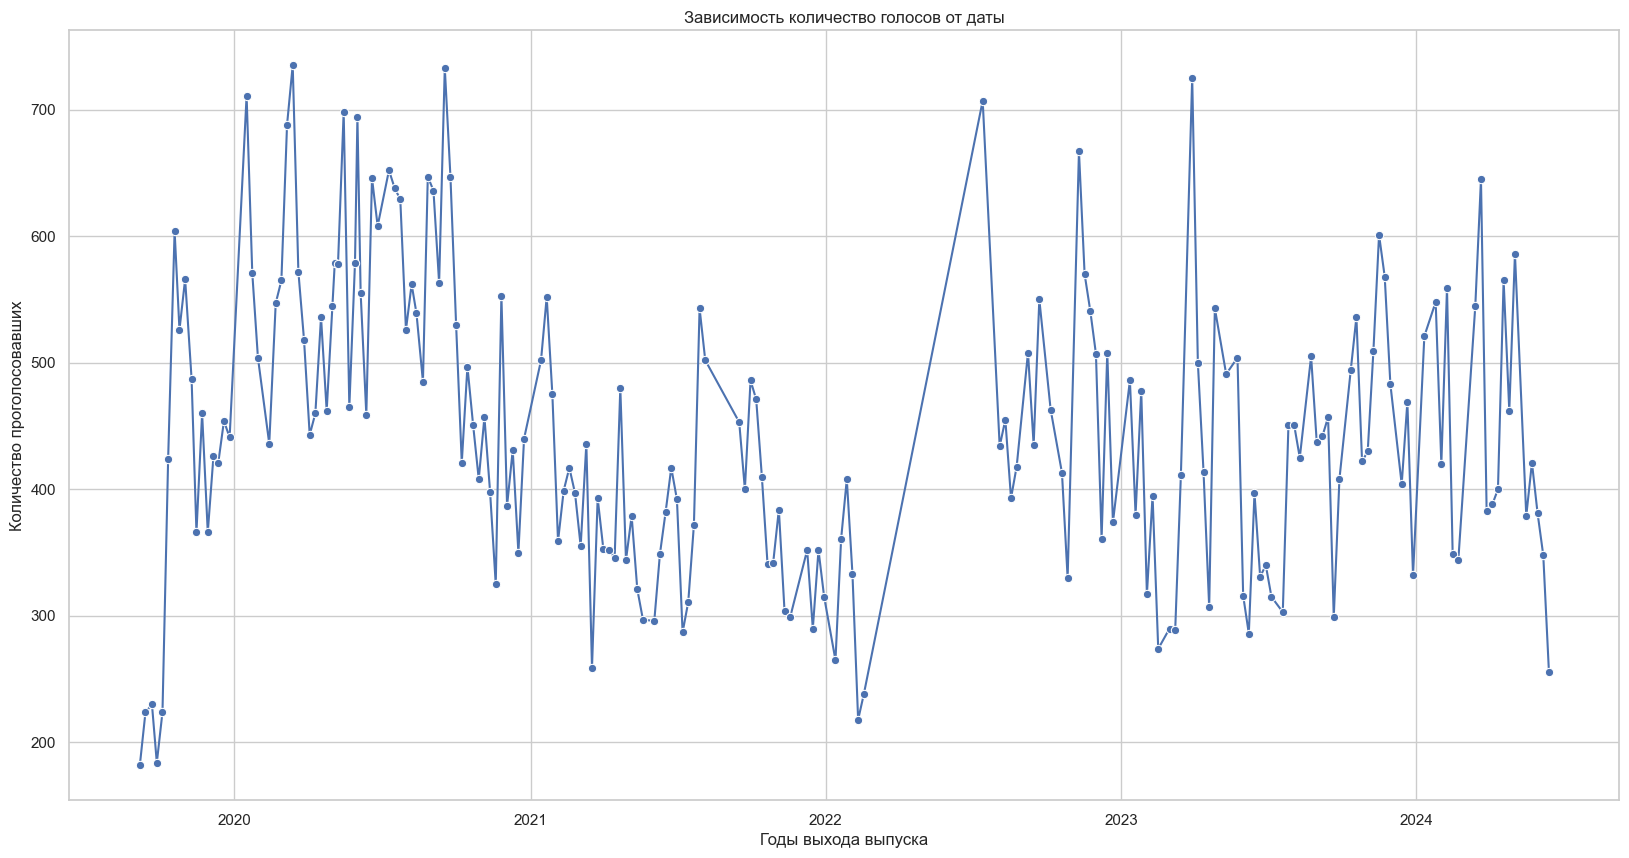

In [126]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))
sns.lineplot(x='Дата', y='Всего', data=df, marker='o', color='b')


plt.xlabel('Годы выхода выпуска')
plt.ylabel('Количество проголосовавших')
plt.title('Зависимость количество голосов от даты')
plt.show()

Считаем скользящее среднее, чтобы уменьшить шум и нагляднее видеть выбросы

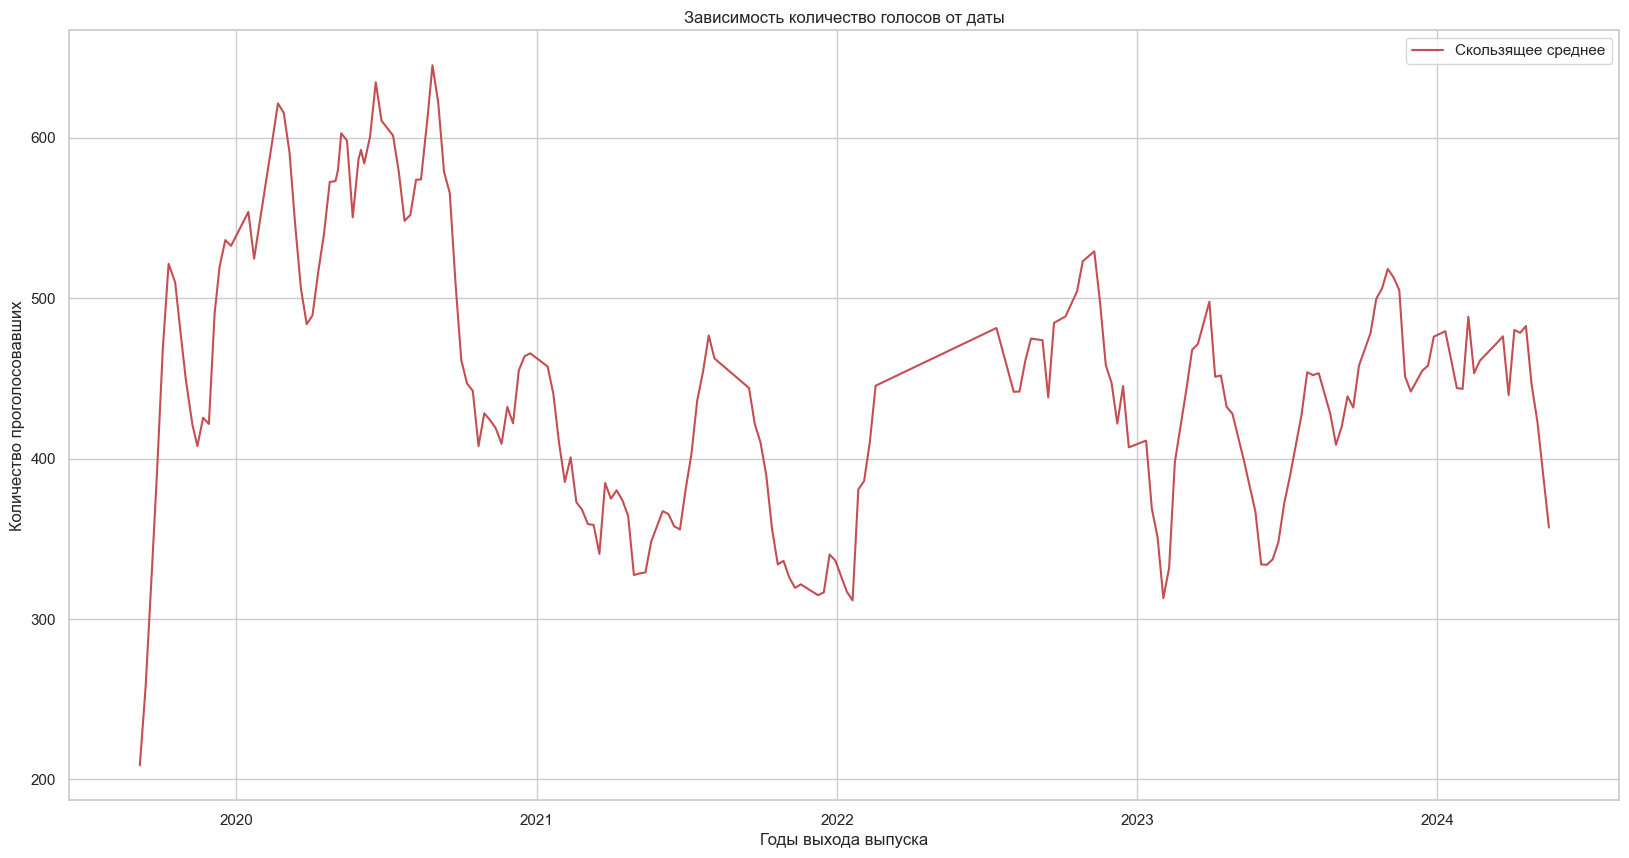

In [127]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))

df['Всего_rolling'] = df['Всего'].rolling(window=5).mean()
sns.lineplot(x='Дата', y='Всего_rolling', data=df, color='r', label='Скользящее среднее')

plt.xlabel('Годы выхода выпуска')
plt.ylabel('Количество проголосовавших')
plt.title('Зависимость количество голосов от даты')
plt.show()




Разбивка стартапов по группам

Для разбивки используются ключевые слова, которые наиболее подходят для выбраной категории

In [196]:
keywords = {
    'IT': ['код', 'хак', 'it', 'ai', 'програм', 'кибер', 'искусствен', 'база', 'веб', 'web', 'аналитик', 'мобиль', 'приложен'],
    'Фрилансеры': ['фриланс', 'удален', 'самозанят'],
    'Бизнес' : ['бизнес', 'цен', 'маркетинг', 'бренд', 'аналитик', 'seo', 'smm', 'management'],
    'Медицина' : ['диагностик ', 'профилактик', 'медицин', 'врач', 'докт', 'хирург ', 'операц', 'маломобильных', 'процедур','здоровь'],
    'Студенчество': ['студент', 'университет', 'школ', 'образован', 'универ', 'экзамен', 'курс', 'общежит'],
    
    'Музыка': ['музык', 'песн', 'звук', 'аккорд', 'мелод'],
    'Спорт': ['тренировк', 'фитнес', 'физкультур', 'атлетик', 'кардио', 'нагруз', 'сорев', 'экипиров'],
    
    
    'Транспорт_и_доставка': ['ремонт', 'машина', 'техобслуж', 'кузов', 'запчаст', 'транспорт', 'курьер', 'доставк'],
    'Поездки_и_путешествия': ['поездк', 'туризм', 'путешеств', 'путевк', 'экскурси', 'курорт', 'проживание'],
    'Кулинария': ['кухн', 'повар', 'еда', 'пищ', 'рецепт', 'ингредиент', 'блюд'],
    
    
}

def categorize(description):
    matched_categories = []
    words_in_description = description.lower().split()  # Разбиваем описание на слова
    
    for category, words in keywords.items():
        if any(any(word.startswith(keyword) for keyword in words) for word in words_in_description):
            matched_categories.append(category)
            
    return ', '.join(matched_categories) if matched_categories else 'Прочее'

# Пример датафрейма
df['Категория'] = df['Описание'].apply(categorize)

# Вывести результат
df['Категория'].unique()

array(['Бизнес', 'IT, Медицина', 'IT, Бизнес', 'IT, Транспорт_и_доставка',
       'Бизнес, Транспорт_и_доставка', 'IT', 'Транспорт_и_доставка',
       'Прочее', 'Бизнес, Медицина', 'Медицина', 'Музыка',
       'IT, Бизнес, Студенчество', 'Студенчество', 'IT, Спорт',
       'IT, Бизнес, Поездки_и_путешествия', 'Фрилансеры',
       'IT, Бизнес, Транспорт_и_доставка', 'Кулинария',
       'Поездки_и_путешествия',
       'Бизнес, Медицина, Транспорт_и_доставка, Кулинария',
       'Бизнес, Студенчество', 'IT, Бизнес, Медицина',
       'IT, Поездки_и_путешествия', 'IT, Студенчество', 'Спорт',
       'Медицина, Студенчество, Спорт', 'IT, Медицина, Спорт',
       'Бизнес, Кулинария'], dtype=object)

Группируем получившиеся данные по уникальным комбинациям категорий, сортируем по убыванию для выявления наиболее популярных категорий

In [201]:
# Функция для подсчета всех категорий, содержащих подкатегорию
def count_subcategory_occurrences(df, subcategories):
    # Разделение категорий на отдельные строки
    categories = df['Категория'].str.split(', ', expand=True)
    categories = categories.melt(value_name='Категория').dropna()['Категория']
    
    # Подсчет всех категорий, содержащих каждую подкатегорию из списка
    results = {}
    for subcategory in subcategories:
        count = categories[categories.str.contains(subcategory, case=True)].count()
        results[subcategory] = count
    
    # Сортировка по убыванию значений
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_results

# Список подкатегорий, которые нужно проверить
subcategories_list = ['Прочее', 'IT', 'Бизнес', 'Музыка', 'Фрилансеры', 'Медицина', 'Спорт', 'Транспорт_и_доставка', 'Поездки_и_путешествия', 'Кулинария', 'Студенчество']

# Подсчет количества всех категорий для каждой подкатегории в списке
subcategory_counts = count_subcategory_occurrences(df, subcategories_list)
subcategory_counts


{'IT': np.int64(69),
 'Прочее': np.int64(67),
 'Бизнес': np.int64(43),
 'Медицина': np.int64(17),
 'Транспорт_и_доставка': np.int64(16),
 'Поездки_и_путешествия': np.int64(8),
 'Студенчество': np.int64(8),
 'Кулинария': np.int64(6),
 'Спорт': np.int64(4),
 'Музыка': np.int64(2),
 'Фрилансеры': np.int64(1)}

Визуализируем данные для большей наглядности

Видим, что распределение по заданным (предполагаемым) группам в основном сосредоточилось на бизнес и IT проектках

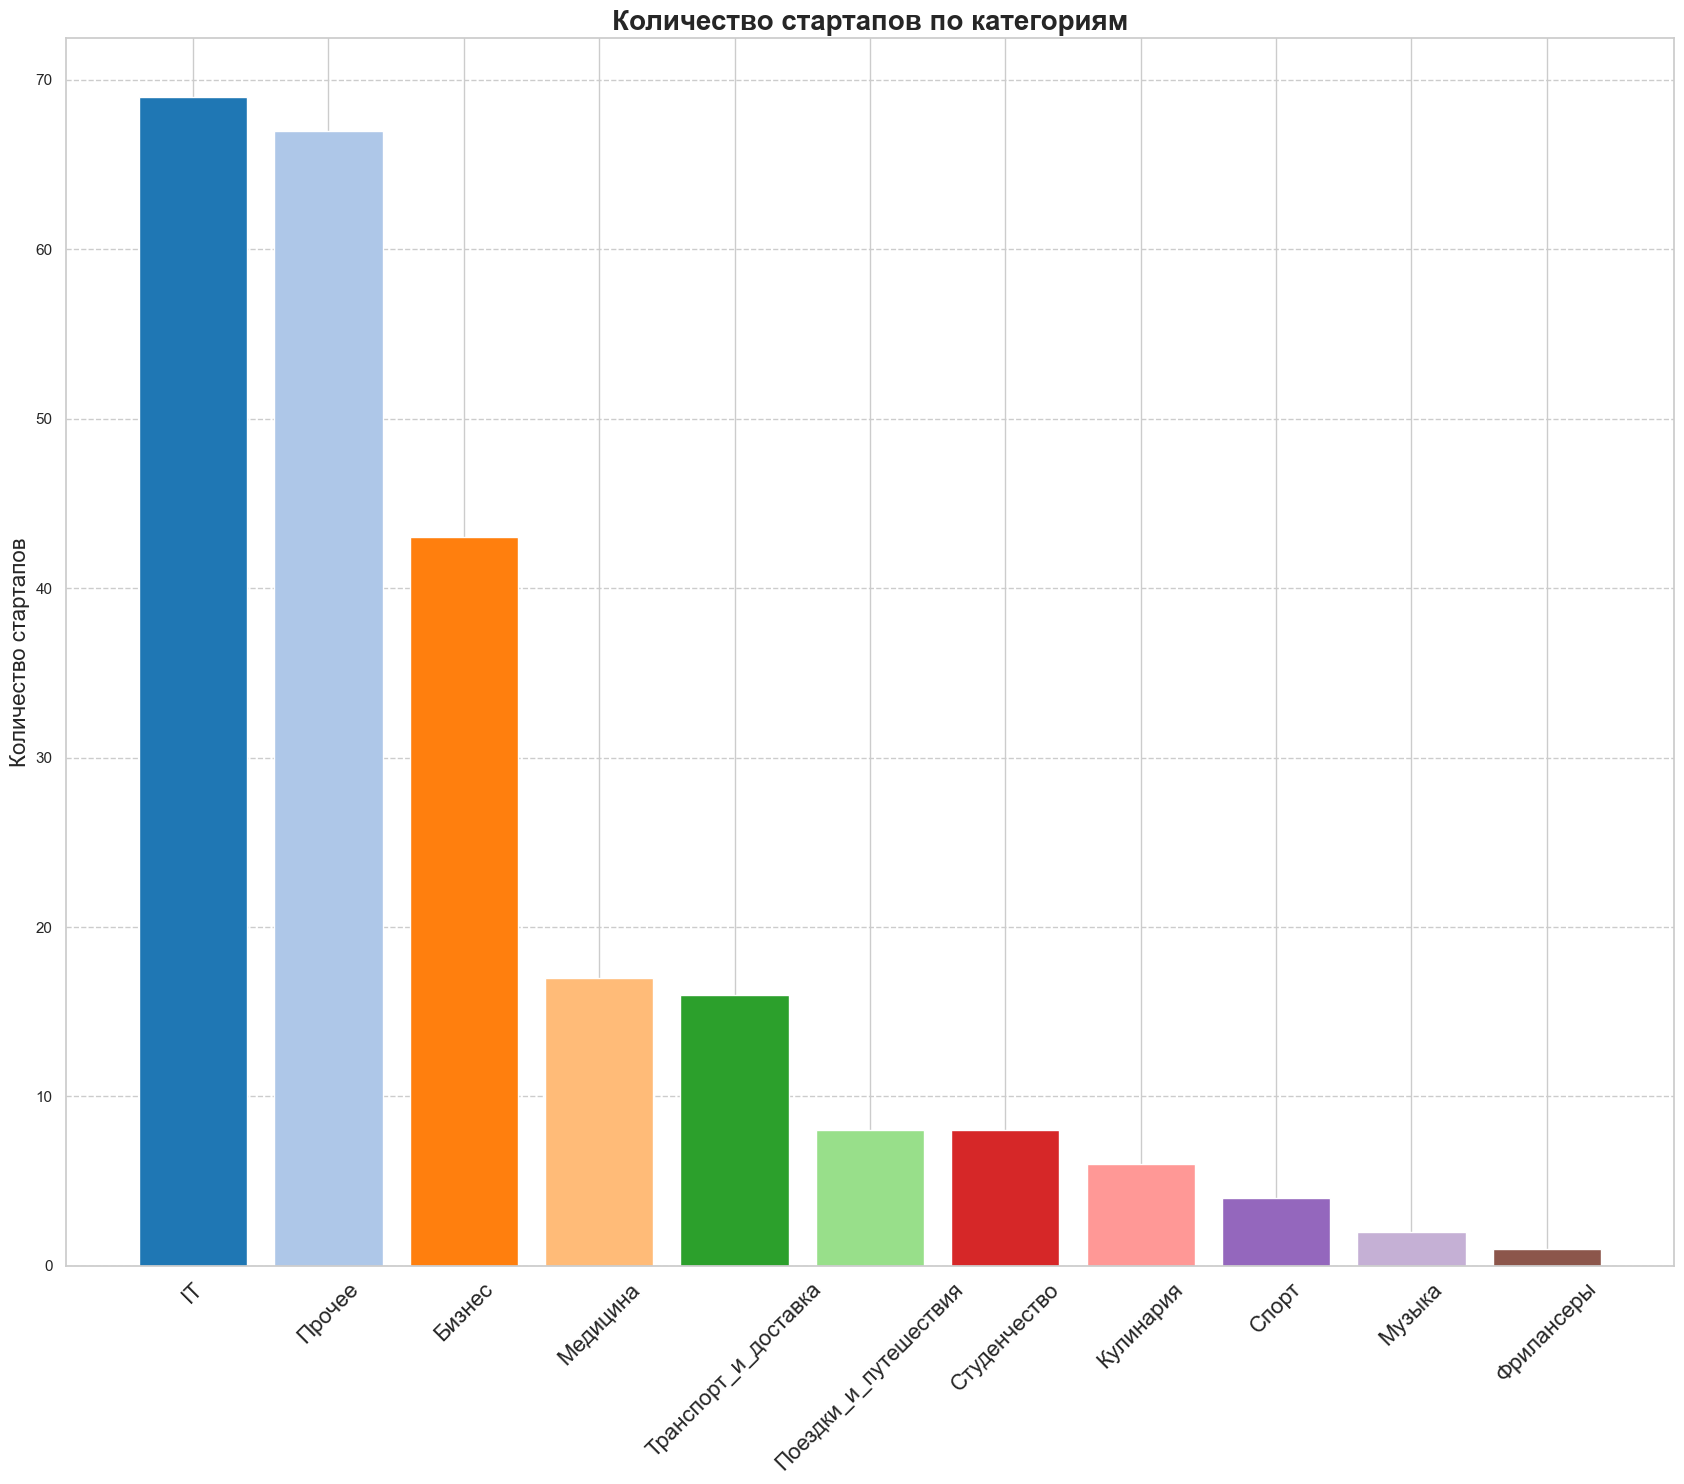

In [219]:
category_labels = list(subcategory_counts.keys())
category_counts = list(subcategory_counts.values())



colors = plt.get_cmap('tab20').colors

plt.figure(figsize=(17, 15))
plt.bar(
    category_labels, 
    category_counts, 
    color=colors[:len(category_labels)]  # Убедитесь, что достаточно цветов для всех категорий
)

plt.title('Количество стартапов по категориям', fontsize=20, fontweight='bold')
plt.ylabel('Количество стартапов', fontsize=16)
plt.xticks(rotation=45, fontsize=16)  # Поворот меток категорий, если они длинные
plt.grid(axis='y', linestyle='--')  # Сетка по вертикальной оси
plt.tight_layout()  # Подгонка для отображения меток
plt.show()

Заметим, что суммарно категории IT и бизнес содержат больше половины всех проектов из исходных данных (52.8%)

Также стоит отметить, что почти треть всех проектов либо не попала ни в одну из категорий, либо же процент от общего числа составлял меньше 5 %

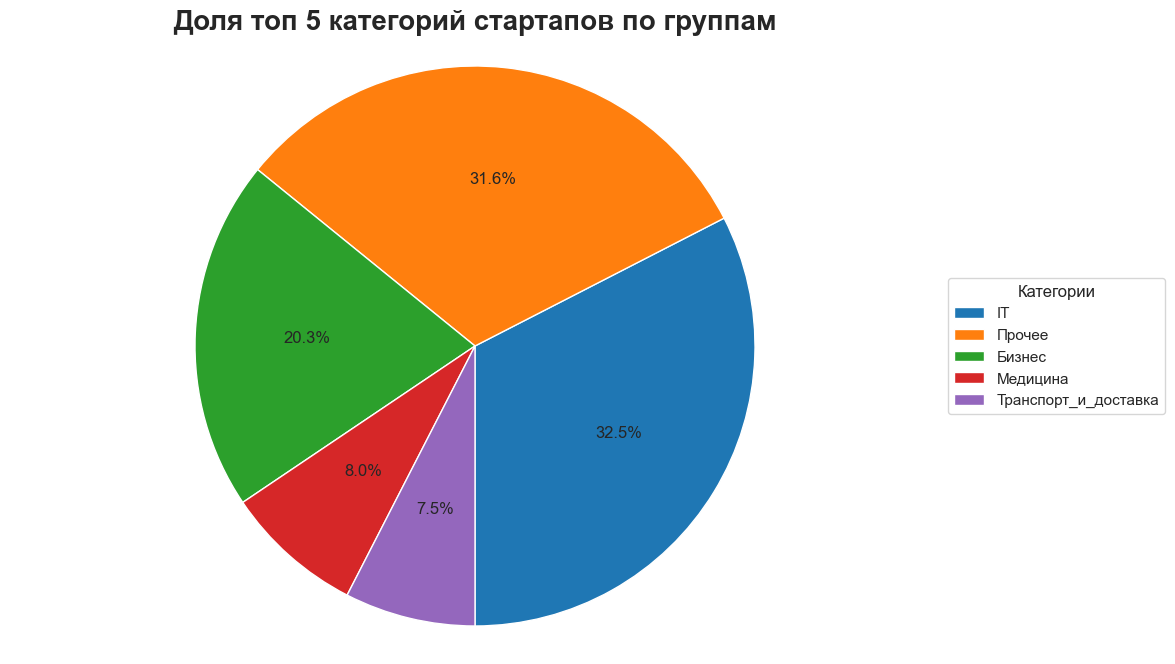

In [235]:

merge_to_other = ['Спорт', 'Музыка', 'Фрилансеры', 'Кулинария', 'Поездки_и_путешествия', 'Студенчество']

category_labels = list(subcategory_counts.keys())
category_counts = list(subcategory_counts.values())
other_count = 0

# Создаем новые списки для обновления
for label, count in zip(category_labels, category_counts):
    if label in merge_to_other:
        other_count += count  # Суммируем категории, которые пойдут в "Прочее"

# Удаляем объединенные категории из исходных списков
category_labels = [label for label in category_labels if label not in merge_to_other]
category_counts = [count for label, count in zip(category_labels, category_counts) if label not in merge_to_other]

# Определение цветов для каждого сегмента
colors = plt.get_cmap('tab10').colors

# Создание круговой диаграммы с объединением в "Прочее"
plt.figure(figsize=(12, 8))
plt.pie(
    category_counts,
    autopct='%1.1f%%', 
    colors=colors[:len(category_labels)],  # Убедитесь, что достаточно цветов для всех категорий
    startangle=-90
)

# Настройка легенды
plt.legend(
    category_labels,
    title="Категории",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Доля топ 5 категорий стартапов по группам', fontsize=20, fontweight='bold')
plt.axis('equal')  # Оформление диаграммы в круг
plt.show()